In [2]:
import pandas as pd
import jieba

### 数据源 http://www.sogou.com/labs/resource/ca.php  ###

In [6]:
df_news = pd.read_table('./data/val.txt',names=['category','thetme','URL','content'],encoding='utf-8')
# df_news.dropna()/
df_news.head()

,category,thetme,URL,content
0,汽车,新辉腾 ４．２ Ｖ８ ４座加长Ｉｎｄｉｖｉｄｕａｌ版２０１１款 最新报价,http://auto.data.people.com.cn/model_15782/,经销商 电话 试驾／订车Ｕ憬杭州滨江区江陵路１７８０号４００８－１１２２３３转５８６４＃保常...
1,汽车,９１８ Ｓｐｙｄｅｒ概念车,http://auto.data.people.com.cn/prdview_165423....,呼叫热线 ４００８－１００－３００ 服务邮箱 ｋｆ＠ｐｅｏｐｌｅｄａｉｌｙ．ｃｏｍ．ｃｎ
2,汽车,日内瓦亮相 ＭＩＮＩ性能版／概念车－１．６Ｔ引擎,http://auto.data.people.com.cn/news/story_5249...,ＭＩＮＩ品牌在二月曾经公布了最新的ＭＩＮＩ新概念车Ｃｌｕｂｖａｎ效果图，不过现在在日内瓦车展...
3,汽车,清仓大甩卖一汽夏利Ｎ５威志Ｖ２低至３．３９万,http://auto.data.people.com.cn/news/story_6144...,清仓大甩卖！一汽夏利Ｎ５、威志Ｖ２低至３．３９万＝日，启新中国一汽强势推出一汽夏利Ｎ５、威志...
4,汽车,大众敞篷家族新成员 高尔夫敞篷版实拍,http://auto.data.people.com.cn/news/story_5686...,在今年３月的日内瓦车展上，我们见到了高尔夫家族的新成员，高尔夫敞篷版，这款全新敞篷车受到了众...


In [7]:
df_news.shape

(5000, 4)

In [31]:
df_news.loc[0].content

'经销商\u3000电话\u3000试驾／订车Ｕ憬杭州滨江区江陵路１７８０号４００８－１１２２３３转５８６４＃保常叮００万９阒菔邪自魄白云大道北１３６１号；广州市天河区黄埔大道西１００号富力盈泰大厦１０５室４００８－１１２２３３转９９１５＃保常福００万Ｉ蕉省淄博市张店区山泉路８９号４００８－１１２２３３转５１５６＃保常叮００万４罅保税区黄海西三路１０１号４００８－１１２２３３转２６０３＃保玻埃００万Ｌ粕绞新纺锨复兴路２１号４００８－１１２２３３转３０４３＃保常叮００万Ｖ泄云南昆明市度假区滇池路１２６８号４００８－１１２２３３转７３１２＃保常叮００万Ｒ川市兴庆区丽景北街８００号４００８－１１２２３３转３２６９＃保常叮００万９尔滨市道外区先锋路４６９号４００８－１１２２３３转２０２９＃保矗福００万３ど呈刑煨那桂花坪街道雀园路口／星沙中南汽车世界Ａ区０５号４００８－１１２２３３转７６６６＃保常梗００万Ｎ浜菏信塘城经济开发区盘龙汽车城＃矗埃埃福１１２２３３转７５２４＃保常叮００万９阒莘禺区市广路９８９号（祈福食街旁）＃矗埃埃福１１２２３３转９９６３＃保常叮００万Ｆ侄新区御桥路１３７７号４００８－１１２２３３转６３３７＃保常福００万０不帐『戏适邪河工业区纬一路２２号１３８．００万Ｉ虾Ｊ斜ι角江杨南路１３８１号４００８－１１２２３３转６７２２＃保常叮００万ｔ奚蕉路１９８号４００８－１１２２３３转５９３３＃保常叮００万１本┦谐阳区北四环望京街６８号４００８－１１２２３３转８６１５＃保玻福００万１本┦胁平区立汤路亚北博晟汽车汇展中心＃保埃福８６万＝西省南昌市青山湖区科技大道５９９号１３６．００万Ｉ苄耸信劢工业区康宁路车管所对面＃保常叮００万Ｄ暇┦薪宁区天元中路１１１号４００８－１１２２３３转５５０１＃保常叮００万３ご菏形餍戮济技术开发区长沈路４２２２号１３６．００万Ｊ家庄市北二环东路８６号河北国际汽车贸易园区＃矗埃埃福１１２２３３转３１７８＃保矗福００万８壅⑶城港路９９号广达车城永兴路３号１３６．００万Ｉ蜓羰刑西区北二中路１１号４００８－１１２２３３转２４９８＃保常叮００万３啥际星嘌虼蟮溃保福负牛ㄐ挛幕宫对面）＃保矗常８０万Ａ赡省沈阳市皇姑区鸭绿江街３２号甲（长客总站北行１５００米）＃保矗福００万Ｉ钲谑新藓区罗芳立交六星汽车园进口大众４Ｓ店４００８－１１２２３３转９８６６＃保担埃０

#### 第一步：分词
---

In [9]:
content = df_news.content.values.tolist()
print(content[1000])

阿里巴巴集团昨日宣布，将在集团管理层面设立首席数据官岗位（Ｃｈｉｅｆ　Ｄａｔａ　Ｏｆｆｉｃｅｒ），阿里巴巴Ｂ２Ｂ公司ＣＥＯ陆兆禧将会出任上述职务，向集团ＣＥＯ马云直接汇报。＞菹ぃ和６月初的首席风险官职务任命相同，首席数据官亦为阿里巴巴集团在完成与雅虎股权谈判，推进“ｏｎｅ　ｃｏｍｐａｎｙ”目标后，在集团决策层面新增的管理岗位。０⒗锛团昨日表示，“变成一家真正意义上的数据公司”已是战略共识。记者刘夏


In [11]:
content_S = []

for line in content:
    segment = jieba.lcut(line)
    if len(segment) > 1 and segment != '\r\n': #换行符
        content_S.append(segment)

In [15]:
content_S[1000]

['阿里巴巴',
 '集团',
 '昨日',
 '宣布',
 '，',
 '将',
 '在',
 '集团',
 '管理',
 '层面',
 '设立',
 '首席',
 '数据',
 '官',
 '岗位',
 '（',
 'Ｃ',
 'ｈ',
 'ｉ',
 'ｅ',
 'ｆ',
 '\u3000',
 'Ｄ',
 'ａ',
 'ｔ',
 'ａ',
 '\u3000',
 'Ｏ',
 'ｆ',
 'ｆ',
 'ｉ',
 'ｃ',
 'ｅ',
 'ｒ',
 '）',
 '，',
 '阿里巴巴',
 'Ｂ',
 '２',
 'Ｂ',
 '公司',
 'Ｃ',
 'Ｅ',
 'Ｏ',
 '陆兆禧',
 '将',
 '会',
 '出任',
 '上述',
 '职务',
 '，',
 '向',
 '集团',
 'Ｃ',
 'Ｅ',
 'Ｏ',
 '马云',
 '直接',
 '汇报',
 '。',
 '＞',
 '菹',
 'ぃ',
 '和',
 '６',
 '月初',
 '的',
 '首席',
 '风险',
 '官',
 '职务',
 '任命',
 '相同',
 '，',
 '首席',
 '数据',
 '官亦为',
 '阿里巴巴',
 '集团',
 '在',
 '完成',
 '与',
 '雅虎',
 '股权',
 '谈判',
 '，',
 '推进',
 '“',
 'ｏ',
 'ｎ',
 'ｅ',
 '\u3000',
 'ｃ',
 'ｏ',
 'ｍ',
 'ｐ',
 'ａ',
 'ｎ',
 'ｙ',
 '”',
 '目标',
 '后',
 '，',
 '在',
 '集团',
 '决策',
 '层面',
 '新增',
 '的',
 '管理',
 '岗位',
 '。',
 '０',
 '⒗',
 '锛',
 '团',
 '昨日',
 '表示',
 '，',
 '“',
 '变成',
 '一家',
 '真正',
 '意义',
 '上',
 '的',
 '数据',
 '公司',
 '”',
 '已',
 '是',
 '战略',
 '共识',
 '。',
 '记者',
 '刘夏']

### 2 去掉停用词表
---

In [50]:
stopwords = pd.read_csv('stopwords.txt', index_col=False,quoting=3,names=['stopwords'], encoding='utf-8')
stopwords.head(20)

,stopwords
0,\u
1,/
2,0
3,1
4,2
5,3
6,4
7,5
8,6
9,7


In [85]:
def drop_stopwords(origin_words,stopwords_list):
    
    clean_words = []
    all_letters = []
    
    for word in origin_words:
        cleanword = []
        for letter in word:
            if letter in stopwords_list or len(letter) == 0:
                continue
            cleanword.append(letter)
            all_letters.append(str(letter))
            
        clean_words.append(cleanword)
    return clean_words, all_letters

In [77]:
stopwords_list = stopwords['stopwords'].values.tolist()
stopwords_list

['\\u',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'A',
 'B',
 'C',
 'D',
 'F',
 'E',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 nan,
 '-',
 '--',
 '.',
 '..',
 '...',
 '......',
 '...................',
 './',
 '.一',
 '记者',
 '数',
 '年',
 '月',
 '日',
 '时',
 '分',
 '秒',
 '/',
 '//',
 ':',
 '://',
 '::',
 ';',
 '<',
 '=',
 '>',
 '>>',
 '?',
 '@',
 'A',
 'Lex',
 '[',
 '\\',
 ']',
 '【',
 '】',
 '^',
 '_',
 '`',
 'exp',
 'sub',
 'sup',
 '|',
 '}',
 '~',
 '~~~~',
 '·',
 '×',
 '×××',
 'Δ',
 'Ψ',
 'γ',
 'μ',
 'φ',
 'φ．',
 'В',
 '—',
 '——',
 '———',
 '‘',
 '’',
 '’‘',
 '“',
 '”',
 '”，',
 '…',
 '……',
 '…………………………………………………③',
 '′∈',
 '′｜',
 '℃',
 'Ⅲ',
 '↑',
 '→',
 '∈［',
 '∪φ∈',
 '≈',


In [74]:
content[0]
content_S[0]

['经销商',
 '\u3000',
 '电话',
 '\u3000',
 '试驾',
 '／',
 '订车',
 'Ｕ',
 '憬',
 '杭州',
 '滨江区',
 '江陵',
 '路',
 '１',
 '７',
 '８',
 '０',
 '号',
 '４',
 '０',
 '０',
 '８',
 '－',
 '１',
 '１',
 '２',
 '２',
 '３',
 '３',
 '转',
 '５',
 '８',
 '６',
 '４',
 '＃',
 '保常',
 '叮',
 '０',
 '０',
 '万',
 '９',
 '阒',
 '菔',
 '邪',
 '自魄',
 '白云',
 '大道北',
 '１',
 '３',
 '６',
 '１',
 '号',
 '；',
 '广州市',
 '天河区',
 '黄埔',
 '大道',
 '西',
 '１',
 '０',
 '０',
 '号',
 '富力',
 '盈泰',
 '大厦',
 '１',
 '０',
 '５',
 '室',
 '４',
 '０',
 '０',
 '８',
 '－',
 '１',
 '１',
 '２',
 '２',
 '３',
 '３',
 '转',
 '９',
 '９',
 '１',
 '５',
 '＃',
 '保常福',
 '０',
 '０',
 '万',
 'Ｉ',
 '蕉',
 '省',
 '淄博市',
 '张店区',
 '山泉',
 '路',
 '８',
 '９',
 '号',
 '４',
 '０',
 '０',
 '８',
 '－',
 '１',
 '１',
 '２',
 '２',
 '３',
 '３',
 '转',
 '５',
 '１',
 '５',
 '６',
 '＃',
 '保常',
 '叮',
 '０',
 '０',
 '万',
 '４',
 '罅',
 '保税区',
 '黄海',
 '西',
 '三路',
 '１',
 '０',
 '１',
 '号',
 '４',
 '０',
 '０',
 '８',
 '－',
 '１',
 '１',
 '２',
 '２',
 '３',
 '３',
 '转',
 '２',
 '６',
 '０',
 '３',
 '＃',
 '保玻埃',
 '０',
 '０',
 '万',
 'Ｌ',
 '粕',
 '绞',
 '新',
 '纺锨',
 '复兴

In [84]:
# print(stopwords_list)
for word in content_S[0]:
#     print(word)
    if word in stopwords_list:
        continue
    print(word)

经销商
电话
试驾
订车
Ｕ
憬
杭州
滨江区
江陵
路
号
转
保常
叮
万
阒
菔
邪
自魄
白云
大道北
号
广州市
天河区
黄埔
大道
西
号
富力
盈泰
大厦
室
转
保常福
万
Ｉ
蕉
省
淄博市
张店区
山泉
路
号
转
保常
叮
万
罅
保税区
黄海
西
三路
号
转
保玻埃
万
Ｌ
粕
绞
新
纺锨
复兴路
号
转
保常
叮
万
Ｖ
泄
云南
昆明市
度假区
滇池
路
号
转
保常
叮
万
Ｒ
川市
兴庆区
丽景
北街
号
转
保常
叮
万
尔滨市
道外区
先锋
路
号
转
保
矗福
万
ど
呈刑
煨
桂花
坪
街道
雀园
路口
星沙
中南
汽车
世界
区
号
转
保常
梗
万
Ｎ
浜
菏
信塘城
经济
开发区
盘龙
汽车城
矗埃埃福
转
保常
叮
万
阒莘禺
区市
广路
号
祈福
食街
旁
矗埃埃福
转
保常
叮
万
Ｆ
侄
新区
御桥
路
号
转
保常福
万
不帐
戏适
邪河
工业区
纬
一路
号
万
Ｉ
虾
Ｊ
斜
ι
角江
杨
南路
号
转
保常
叮
万
ｔ
奚蕉路
号
转
保常
叮
万
┦
谐阳区
北四环
望京
街
号
转
保玻福
万
┦
胁
平区立
汤路
亚北博晟
汽车
汇展
中心
保埃福
万
西省
南昌市
青山湖区
科技
大道
号
万
Ｉ
苄
耸信
劢
工业区
康宁
路
车管所
对面
保常
叮
万
Ｄ
暇
┦
薪宁区
天元
中路
号
转
保常
叮
万
ご
菏形
餍
戮济
技术开发区
长沈路
号
万
Ｊ
家庄
市
北二环
东路
号
河北
国际
汽车贸易
园区
矗埃埃福
转
保
矗福
万
壅
⑶
城港路
号
广达
车城
永兴路
号
万
Ｉ
蜓
羰刑
西区
北二
中路
号
转
保常
叮
万
啥际星
嘌
虼
蟮
溃
保福
负牛
ㄐ
挛幕宫
对面
保
矗常
万
赡省
沈阳市
皇姑区
鸭绿江
街
号
甲
长客
总站
北
行
米
保
矗福
万
Ｉ
钲
谑
新藓区
罗芳
立交
六星
汽车
园
进口
大众
Ｓ
店
转
保担
埃
万
ご
憾
环城路
号
万


In [94]:

stopwords_list += ['Ｕ','⑶','S','V','J','I']
clean_words , all_letters = drop_stopwords(content_S, stopwords_list)

In [88]:
df_clean_words = pd.DataFrame({'clean_content':clean_words})
df_all_words = pd.DataFrame({'all_words':all_letters})

In [102]:
df_clean_words.head()

,clean_content
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ..."
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念..."
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ..."
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,..."


In [103]:
df_all_words.head(20)

,all_words
0,经销商
1,电话
2,试驾
3,订车
4,Ｕ
5,憬
6,杭州
7,滨江区
8,江陵
9,路


### 词频统计

In [104]:
words_count = df_all_words.apply(pd.value_counts)

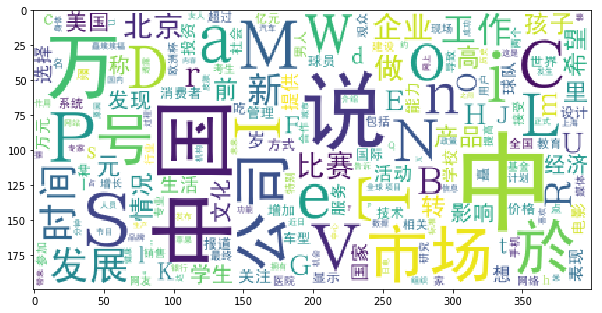

In [137]:
import wordcloud
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (10,6)
wc = WordCloud(font_path='./data/simhei.ttf',background_color='white',max_font_size=80)

wf = words_count['all_words'].to_dict()
wc = wc.fit_words(wf)
plt.imshow(wc)

### TF-IDF 提取关键词

In [140]:
import jieba.analyse

s = df_news['content'][2400]
s_str = "".join(s)
tags = jieba.analyse.extract_tags(s_str,topK=5, withWeight=False)
print(tags)

['耐克', '阿迪达斯', '欧洲杯', '球衣', '西班牙']


### IDA 模型
---

In [141]:
from gensim import corpora, models, similarities
import gensim

In [143]:
# 制作词袋
dictions = corpora.Dictionary(clean_words)
corpus = [dictions.doc2bow(sentence) for sentence in clean_words]

In [144]:
ida = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dictions, num_topics=20) #类kmeans

In [145]:
print(ida.print_topic(1, topn=5))

0.005*"中" + 0.005*"学生" + 0.005*"中国" + 0.004*"工作" + 0.004*"学校"


In [147]:
for topic in ida.print_topics(num_topics=20, num_words=5):
    print(topic[1])

0.029*"男人" + 0.018*"女人" + 0.005*"中" + 0.004*"性爱" + 0.004*"爱"
0.005*"中" + 0.005*"学生" + 0.005*"中国" + 0.004*"工作" + 0.004*"学校"
0.005*"中" + 0.005*"院校" + 0.004*"考生" + 0.004*"中国" + 0.004*"说"
0.007*"出轨" + 0.005*"阿迪达斯" + 0.003*"中" + 0.003*"中国" + 0.003*"飞行"
0.010*"中" + 0.005*"Ｔ" + 0.004*"卫视" + 0.004*"说" + 0.004*"饰演"
0.007*"撒" + 0.006*"比赛" + 0.004*"说" + 0.003*"Ｎ" + 0.003*"中"
0.004*"Ｃ" + 0.002*"时间" + 0.002*"ｉ" + 0.002*"Ｓ" + 0.002*"睡衣"
0.011*"ｅ" + 0.010*"ａ" + 0.009*"Ｓ" + 0.008*"Ｍ" + 0.007*"Ｖ"
0.006*"赛季" + 0.005*"中国" + 0.005*"中" + 0.004*"联赛" + 0.004*"离婚"
0.006*"节目" + 0.005*"中" + 0.005*"邱" + 0.004*"分手" + 0.004*"恋情"
0.012*"说" + 0.009*"中" + 0.004*"做" + 0.003*"两人" + 0.003*"结婚"
0.006*"中" + 0.004*"肌肤" + 0.004*"说" + 0.004*"Ｓ" + 0.004*"电影"
0.028*"ａ" + 0.026*"ｅ" + 0.023*"ｉ" + 0.022*"ｎ" + 0.021*"ｏ"
0.013*"电影" + 0.011*"中国" + 0.010*"导演" + 0.008*"影片" + 0.008*"观众"
0.009*"中" + 0.004*"中国" + 0.003*"官兵" + 0.003*"香港" + 0.002*"Ｔ"
0.006*"中" + 0.004*"说" + 0.004*"万" + 0.003*"Ｖ" + 0.003*"张绍"
0.007*"节目" + 0.005*"说" + 0.004*

In [148]:
df_train = pd.DataFrame({'contents_clean':clean_words,'labels':df_news['category']})
df_train.tail()

,contents_clean,labels
4995,"[天气, 炎热, 补水, 变得, 美国, 跑步, 世界, 杂志, 报道, 喝水, 身体, 补...",时尚
4996,"[不想, 说, 话, 刺激, 说, 做, 只能, 走, 离开, 伤心地, 想起, 一句, 话...",时尚
4997,"[岁, 刘晓庆, 最新, 嫩照, Ｏ, 衷, 诘, 牧跸, 庆, 看不出, 岁, 秒杀, 刘...",时尚
4998,"[导语, 做, 爸爸, 一种, 幸福, 无论是, 领养, 亲生, 更何况, 影视剧, 中, ...",时尚
4999,"[全球, 最美, 女人, 合成图, 国, 整形外科, 教授, 李承哲, 国际, 学术, 杂志...",时尚


In [156]:
set(df_train['labels'].values)

{'体育', '健康', '军事', '娱乐', '教育', '文化', '时尚', '汽车', '科技', '财经'}

In [157]:
df_train.labels.unique()

array(['汽车', '财经', '科技', '健康', '体育', '教育', '文化', '军事', '娱乐', '时尚'],
      dtype=object)

In [194]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train['contents_clean'].values, df_train['labels'].values, random_state=42)

In [195]:
def convert2word(inp):
    words = []
    for line_index in range(len(inp)):
        try:
            #x_train[line_index][word_index] = str(x_train[line_index][word_index])
            words.append(' '.join(inp[line_index]))
        except:
            print (line_index,word_index)
    return words

x_train = convert2word(x_train)
x_test = convert2word(x_test)

In [196]:
x_train[4]

'本周 世界 尿失禁 周 Ｅ 生 憋 尿 成病 穿 尿不湿 高考 Ｏ 阅行裕 女白领 急迫 性 尿失禁 医生 提醒 憋 尿 多喝水 奥杪瑁 趟 厕所 昨天 大坪 医院 泌尿外科 等待 就诊 半个 小时 里 刘 前前后后 共去 趟 厕所 平均 分钟 尿频 刘 高考 垫 著 尿不湿 刚礁 呖 汲 锬 螨 Ｐ 酰保杆 辏 家住 李家 沱 高三 毕业生 高一 刘 一门心思 放在 学习 成绩 不错 年级 前三名 呷 学业 越来越 紧 刘说 教室 厕所 走廊 两端 相距 米左右 下课 期间 节约 时间 做 两道 题 选择 憋 尿 坝 惺 焙 颍 憋 膀胱 很胀 厕所 半年前 刘 发现自己 尿频 小时 厕所 排 尿 有时候 上课 途中 举手 请假 厕所 Ｐ 鹾 吐 杪 杪 阑荻家 晕 学习 压力 太 好好 休息 调整 心态 情况 好转 月份 病情 刘 尿频 发展 成 半个 小时 厕所 Ｉ 峡味 嫉嬷 尿不湿 Ｉ 峡纹 诩 洌 刘 总会 时不时 举手 打断 老师 讲课 错过 老师 分析 试题 关键 内容 朋友 问 麽 说 拉肚子 总 天天 拉 Ｎ 耽误 学习 尴尬 刘 垫 著 尿不湿 学校 上课 高考 垫 尿不湿 刘说 高考 注意力 尿频 困扰 Ｈ 欢 考试 完后 病情 好转 日益严重 十多分钟 去一趟 厕所 伴有 尿痛 情况 尴尬 两次 跑 厕所 尿 溢出 笃阂 皆 谀 蚩浦 魅卫 钛 宸 嫠 担小 刘 尿频 尿失禁 情况 於 长期 憋 尿 习惯 所致 ﹔ 长期 垫 尿不湿 尿路 感染 加重 病情 患上 急迫 性 尿失禁 颊 叨 嗍 桥 白领 钛 宸 娉 疲 急迫 性 尿失禁 患者 女性 白领 女白领 工作 压力 事情 选择 事情 做 完 小便 久而久之 憋 尿 成 一种 习惯 憋 尿 急迫 性 尿失禁 原因 女性 於 构造 患上 感染 局苁恰 笆 澜 缒 蚴 Ы 周 李彦锋 提醒 市民 憋 尿 多喝水 降低 尿路感染 几率 患上 急迫 性 尿失禁'

In [197]:
# 词频向量化
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(analyzer='word', max_features=4000, lowercase=False)
vec.fit(x_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=4000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [198]:
# 贝叶斯分类器
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vec.transform(x_train), y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [199]:
classifier.score(vec.transform(x_test), y_test)

0.7896

In [200]:
# 使用 tfi-df 向量化
from sklearn.feature_extraction.text import TfidfVectorizer
vectorize = TfidfVectorizer(analyzer='word',max_features=4000, lowercase=False)
vectorize.fit(x_train)

classifier2 = MultinomialNB()
classifier2.fit(vectorize.transform(x_train), y_train)
score = classifier2.score(vectorize.transform(x_test), y_test)
print(score)

0.7976
